# Project Journal

**Name:** Chandler Yang

**Research Question:** Looking at the impact of different renewable sources on the total renewable energy consumption in the U.S. from 1980 to 2021, can the growth in total renewable energy consumption be explained by the combined influence of solar, wind, biomass, and hydroelectric energy?

**Variables:**  
$Y$: Total Renewable Energy  
$X_1$: Solar Energy  
$X_2$: Wind Energy  
$X_3$: Biomass Energy  
$X_4$: Hydroelectric Power 

## Data Prep & EDA  
### Data Cleaning Summary
**Summary of data cleaning process:**
1. Import libraries
2. Import dataset
3. Check for missing values
4. Filter dataset for necessary columns 

**Issues Encountered and Resolutions:** Minor column syntax issues and was able to resolve by printing the column names.

In [7]:
#Step 1: Import necessary libraries
library(Metrics)
library(lmtest)
library(mgcv)
library(caret)
library(nlme)
library(car)
library(factoextra)
library(knitr)
library(GGally)
library(corrplot)
library(tidyr)
library(dplyr)
library(ggplot2)

In [8]:
#Step 2: Import dataset
data <- read.csv("/Users/chandleryang/Desktop/USRenewableEnergyConsumption.csv")

In [9]:
#Step 3: Check for missing values 
missing_values <- colSums(is.na(data))
print(missing_values) # Print the count of missing values in each column

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [10]:
#Step 4: Filter dataset for the years 1980 - 2021 and select relevant columns
filtered_data <- data %>%
  filter(Year >= 1980 & Year <= 2021) %>%
  select(
    Year, # Year
    Month, # Month
    Total_Renewable_Energy = Total.Renewable.Energy, # Y
    Solar_Energy = Solar.Energy, # X1
    Wind_Energy = Wind.Energy, # X2
    Biomass_Energy = Biomass.Energy, # X3
    Hydroelectric_Power = Hydroelectric.Power # X4
  )

head(filtered_data)

,Year,Month,Total_Renewable_Energy,Solar_Energy,Wind_Energy,Biomass_Energy,Hydroelectric_Power
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1980,1,1.779,0,0,1.779,0.000
2,1980,1,87.934,0,0,0.537,0.000
3,1980,1,136.514,0,0,135.519,0.995
4,1980,1,71.995,0,0,0.000,0.000
5,1980,1,0.000,0,0,0.000,0.000
6,1980,2,1.664,0,0,1.664,0.000


### Exploratory Data Analysis Findings
**Key Visualizations:**  
- The time series plots show that total renewable energy consumption has increased over time, driven by rapid growth in wind and solar energy since the 2000s. Biomass energy has also grown but at a steadier rate, while hydroelectric power has fluctuated and declined slightly in recent years.
- The correlation matrix and plot show significant correlations between Biomass Energy and Hydroelectric Power, Solar Energy and Wind Energy, and Total Renewable Energy and Biomass Energy.
- The pair plot shows that Biomass has a strong positive correlations with Total Renewable Energy, contributing significantly to the overall trend. Solar and Wind Energy show weaker correlations with Total Renewable Energy but are strongly correlated with each other. 
- The PCA plots show that the first two principal components explain a large portion of the variance in the data. In the biplot, Hydroelectric Power and Biomass Energy are positively aligned with the first principal component (Dim1), where they contribute strongly to this component and are similar in their variation patterns. The Total Renewable Energy consumption is influenced by these sources, with Hydroelectric and Biomass behaving differently from Solar and Wind.

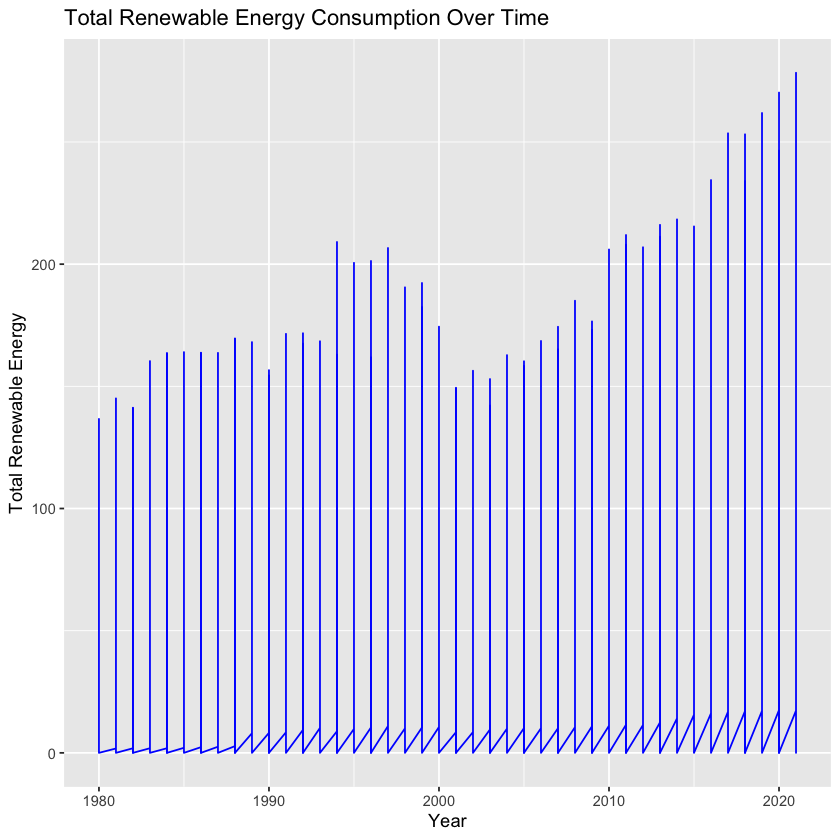

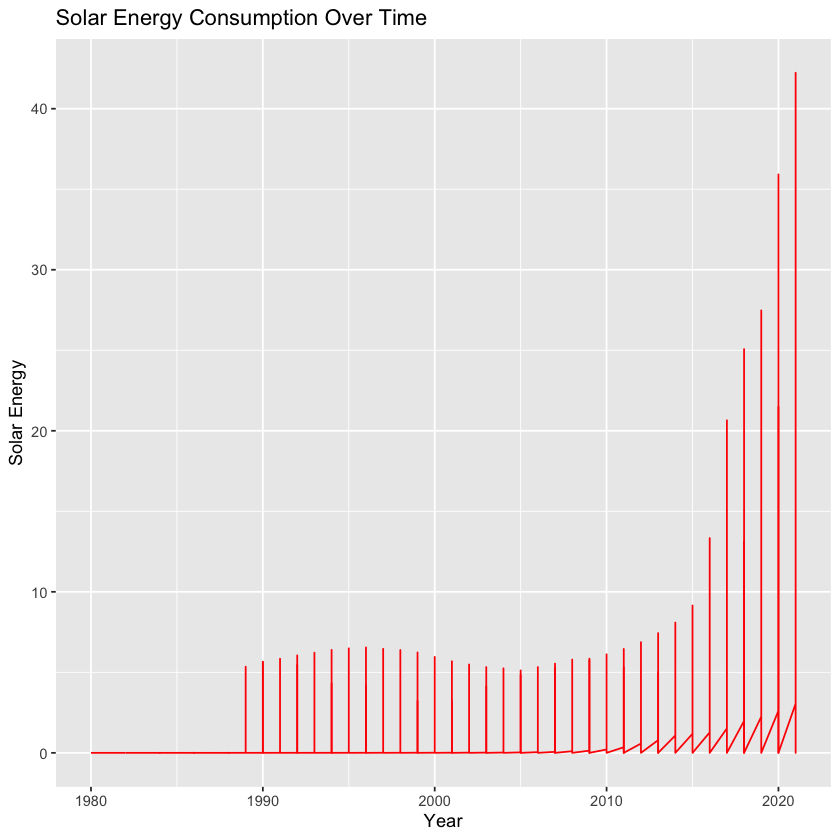

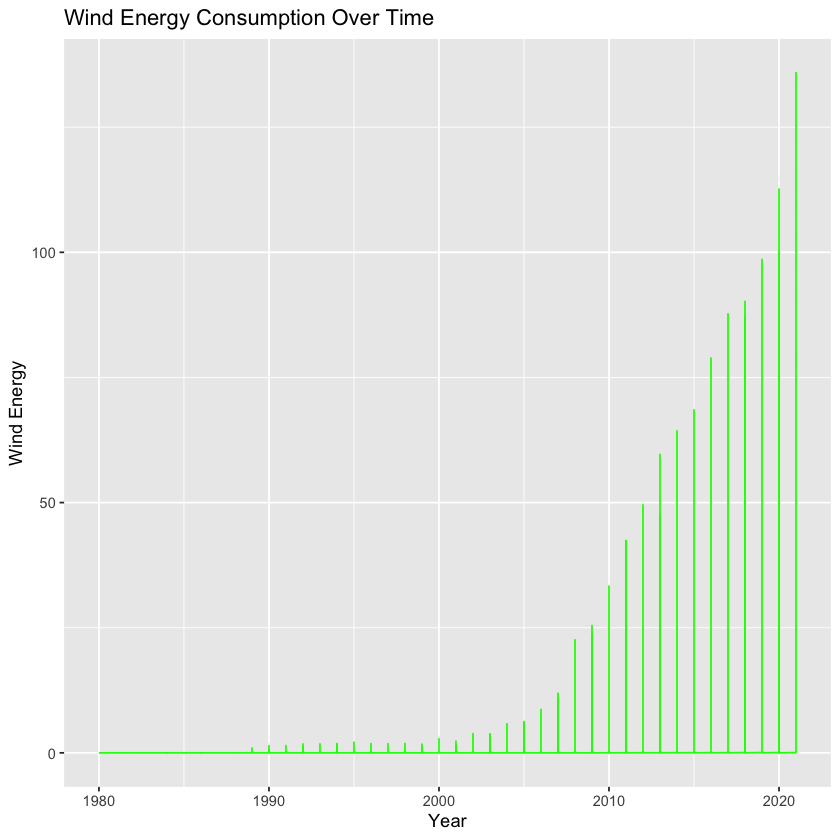

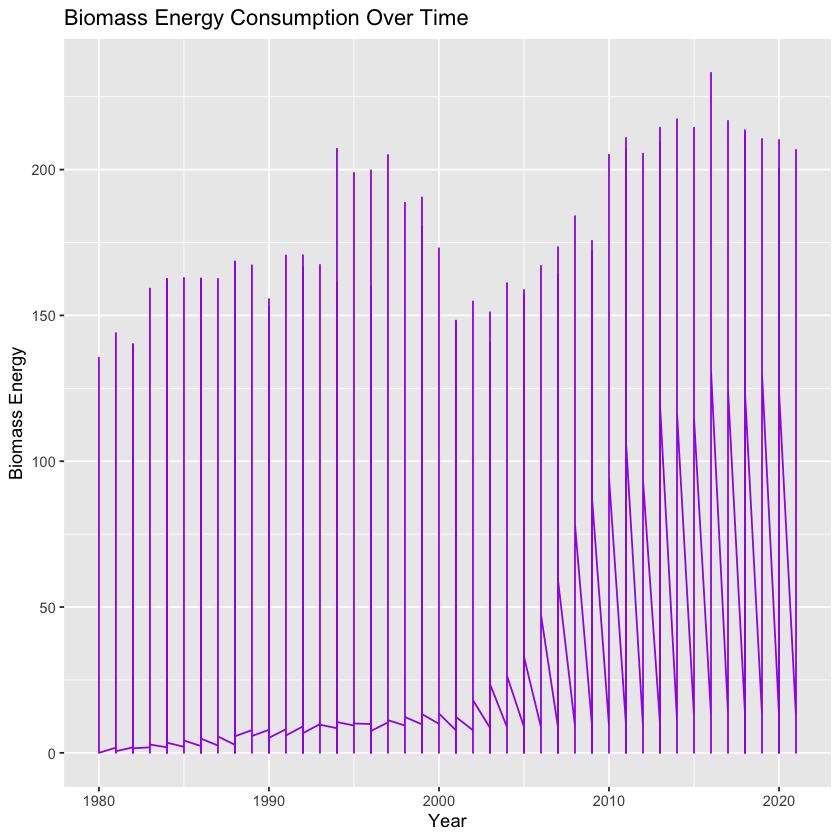

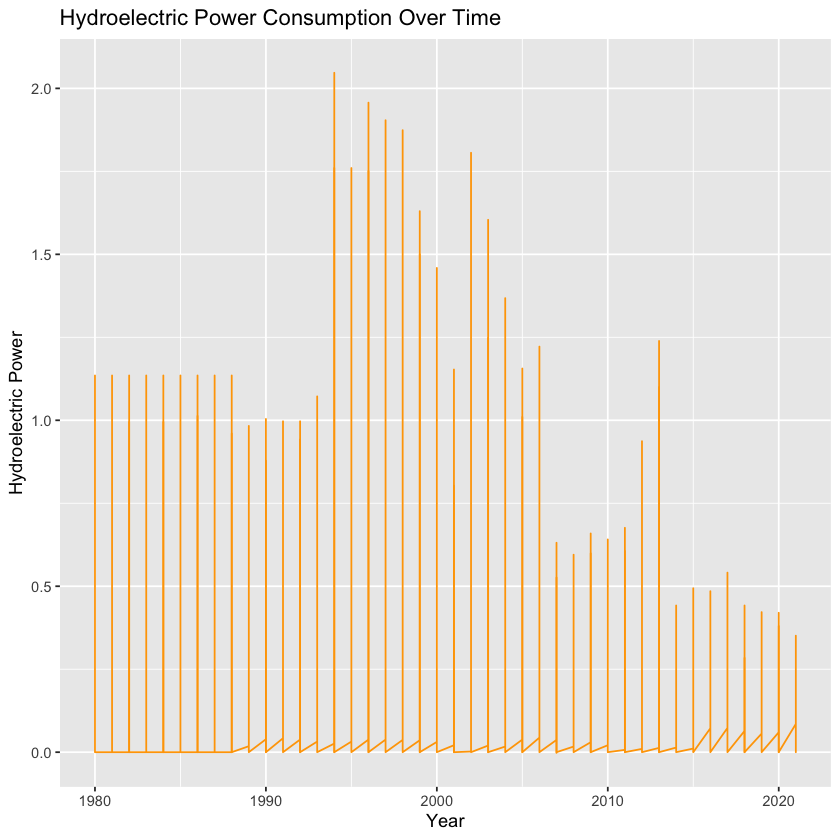

In [11]:
# Time Series Plots for Total Renewable Energy and Each Renewable Source
# Plot for Total Renewable Energy
ggplot(filtered_data, aes(x = Year, y = Total_Renewable_Energy)) +
  geom_line(color = "blue") +
  labs(title = "Total Renewable Energy Consumption Over Time",
       x = "Year",
       y = "Total Renewable Energy")

# Plot for Solar Energy
ggplot(filtered_data, aes(x = Year, y = Solar_Energy)) +
  geom_line(color = "red") +
  labs(title = "Solar Energy Consumption Over Time",
       x = "Year",
       y = "Solar Energy")

# Plot for Wind Energy
ggplot(filtered_data, aes(x = Year, y = Wind_Energy)) +
  geom_line(color = "green") +
  labs(title = "Wind Energy Consumption Over Time",
       x = "Year",
       y = "Wind Energy")

# Plot for Biomass Energy
ggplot(filtered_data, aes(x = Year, y = Biomass_Energy)) +
  geom_line(color = "purple") +
  labs(title = "Biomass Energy Consumption Over Time",
       x = "Year",
       y = "Biomass Energy")

# Plot for Hydroelectric Power
ggplot(filtered_data, aes(x = Year, y = Hydroelectric_Power)) +
  geom_line(color = "orange") +
  labs(title = "Hydroelectric Power Consumption Over Time",
       x = "Year",
       y = "Hydroelectric Power")

[1] "Significant Correlations (|correlation| > 0.5):"
              Variable_1          Variable_2 Correlation
1         Biomass_Energy Hydroelectric_Power   0.7359042
2           Solar_Energy         Wind_Energy   0.6842384
3 Total_Renewable_Energy      Biomass_Energy   0.6360628
4 Total_Renewable_Energy Hydroelectric_Power   0.5287672


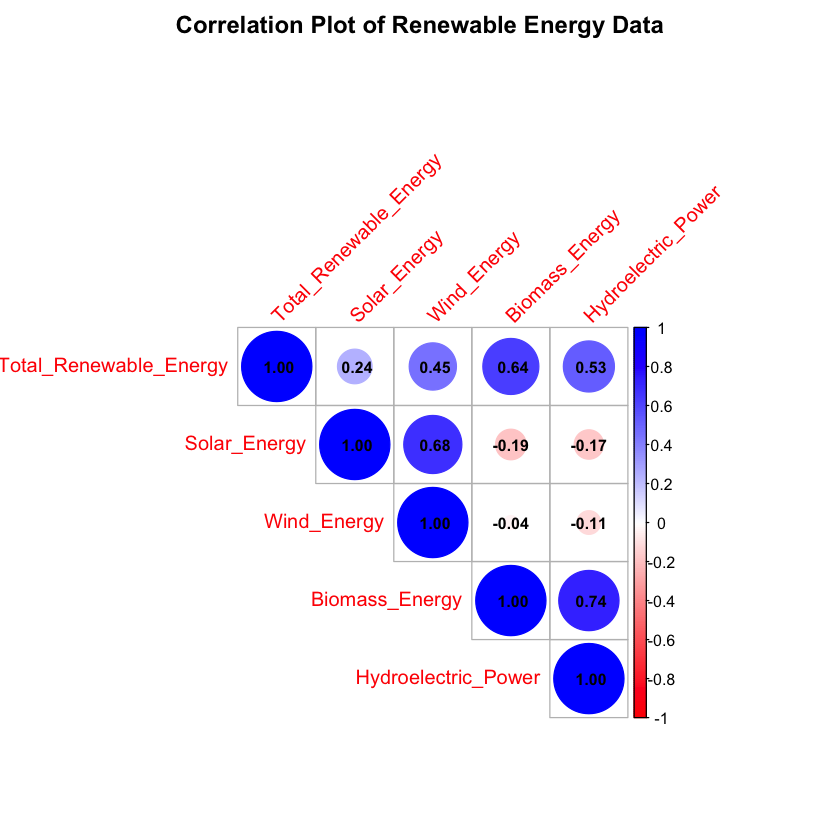

In [12]:
# Significant Correlations Between the Different Energy Sources and Total Renewable Energy
# Calculate the correlation matrix 
cor_matrix <- cor(filtered_data %>% select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power))

cor_tidy <- as.data.frame(as.table(cor_matrix))
colnames(cor_tidy) <- c("Variable_1", "Variable_2", "Correlation")

# Filter for significant correlations (|correlation| > 0.5), remove self-correlations, and retain only unique pairs
significant_correlations <- cor_tidy %>%
  filter(abs(Correlation) > 0.5 & Variable_1 != Variable_2) %>%
  arrange(desc(abs(Correlation))) %>%
  filter(as.numeric(factor(Variable_1)) < as.numeric(factor(Variable_2)))

print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

# Correlation Plot for Entire Correlation Matrix
library(corrplot)
corrplot(
  cor_matrix,
  method = "circle",             
  type = "upper",                
  tl.col = "red",                
  tl.srt = 45,                   
  addCoef.col = "black",         
  number.cex = 0.8,              
  col = colorRampPalette(c("red", "white", "blue"))(200), 
  title = "Correlation Plot of Renewable Energy Data", 
  mar = c(0, 0, 2, 0)            
)

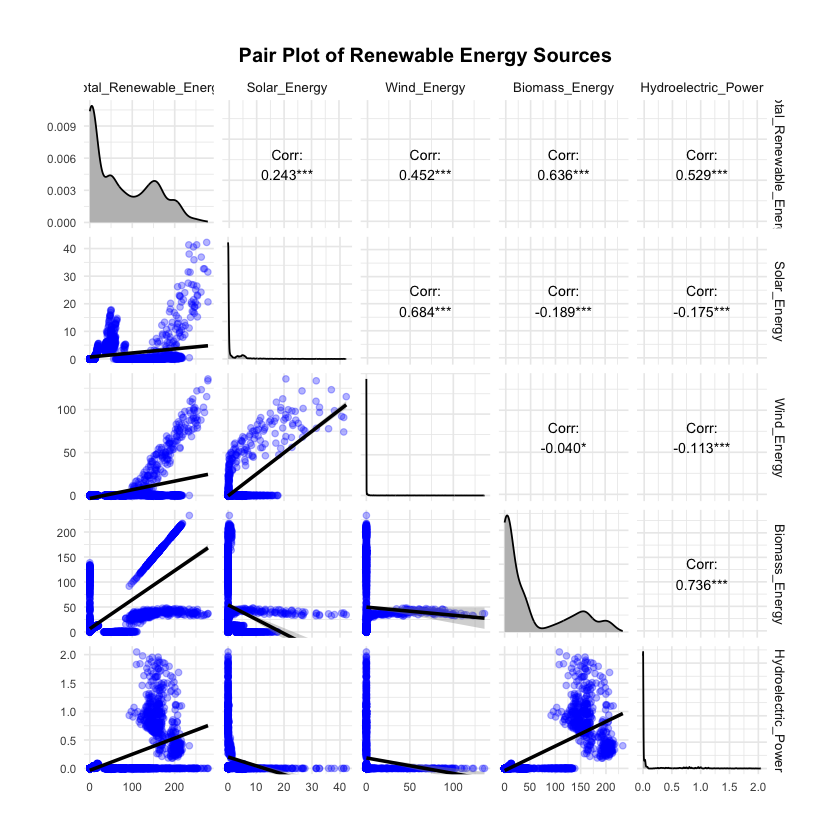

In [13]:
# Pair Plot to See Variable Pair's Relationships
ggpairs(
  filtered_data %>% select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power),
  title = "Pair Plot of Renewable Energy Sources",
  upper = list(continuous = wrap("cor", size = 3, color = "black")),   
  lower = list(continuous = wrap("smooth", alpha = 0.3, color = "blue")),
  diag = list(continuous = wrap("densityDiag", fill = "grey", color = "black"))
) +
  theme_minimal(base_size = 10) +                   
  theme(
    plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),  
    axis.text = element_text(size = 7),            
    strip.text = element_text(size = 8),           
    plot.margin = unit(c(1, 1, 1, 1), "cm")         
  )

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.5139 1.3760 0.61396 0.48773 0.44706
Proportion of Variance 0.4584 0.3787 0.07539 0.04758 0.03997
Cumulative Proportion  0.4584 0.8371 0.91245 0.96003 1.00000

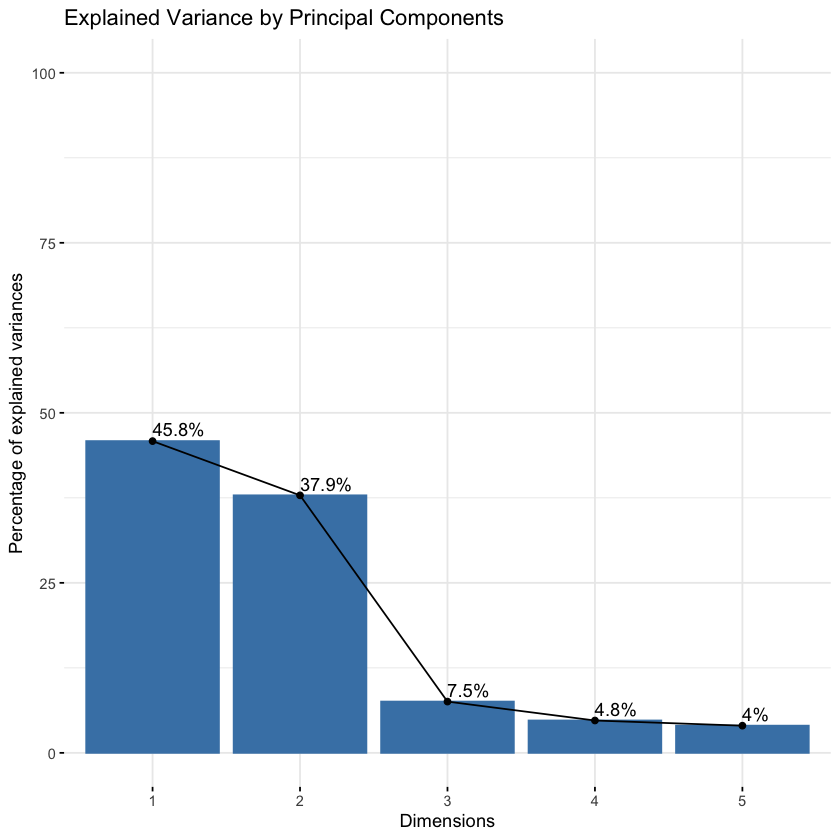

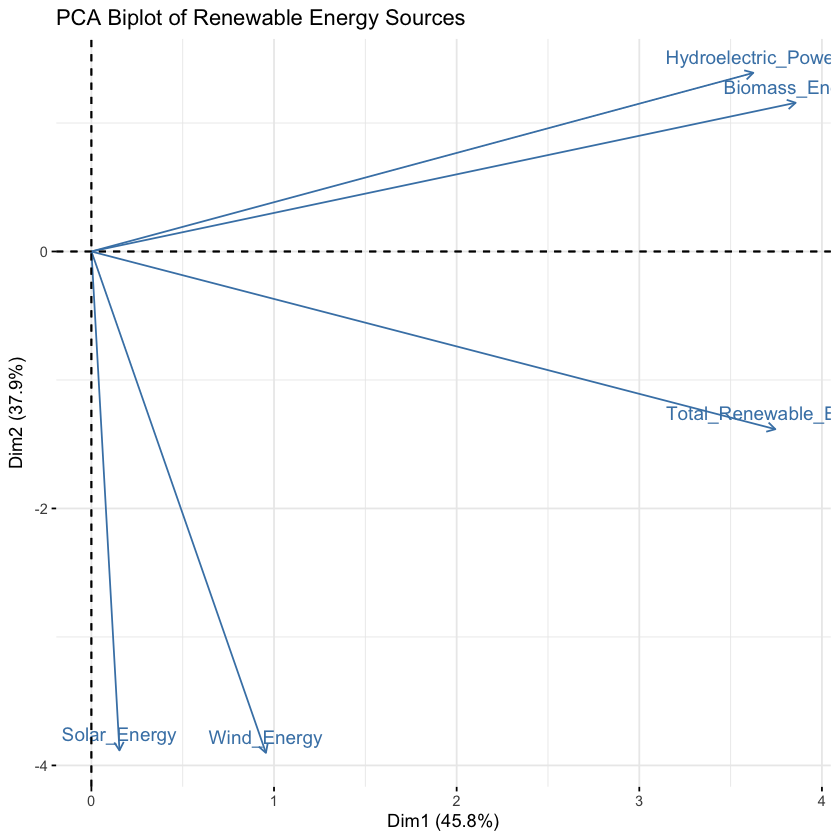

In [14]:
# PCA to Examine the Combined Variance Explained by Multiple Renewable Sources
pca_data <- filtered_data %>% 
  select(Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power, Total_Renewable_Energy) %>%
  na.omit()  # Remove rows with NA values for PCA

# Perform PCA (scale = TRUE to standardize the data)
pca_result <- prcomp(pca_data, scale = TRUE)
summary(pca_result)

# Plot explained variance by each principal component
fviz_eig(pca_result, addlabels = TRUE, ylim = c(0, 100)) +
  labs(title = "Explained Variance by Principal Components")

# Biplot to visualize the PCA
fviz_pca_biplot(pca_result, label = "var", 
                habillage = filtered_data$Year, addEllipses = FALSE, 
                title = "PCA Biplot of Renewable Energy Sources",
                geom.ind = list(shape = 19)) 

### Summary Statistics

In [15]:
# Calculate Summary Statistics for Each Numeric Column in the Dataset
summary_stats <- filtered_data %>%
  summarise(
    Total_Renewable_Energy_mean = mean(Total_Renewable_Energy, na.rm = TRUE),
    Total_Renewable_Energy_sd = sd(Total_Renewable_Energy, na.rm = TRUE),
    Solar_Energy_mean = mean(Solar_Energy, na.rm = TRUE),
    Solar_Energy_sd = sd(Solar_Energy, na.rm = TRUE),
    Wind_Energy_mean = mean(Wind_Energy, na.rm = TRUE),
    Wind_Energy_sd = sd(Wind_Energy, na.rm = TRUE),
    Biomass_Energy_mean = mean(Biomass_Energy, na.rm = TRUE),
    Biomass_Energy_sd = sd(Biomass_Energy, na.rm = TRUE),
    Hydroelectric_Power_mean = mean(Hydroelectric_Power, na.rm = TRUE),
    Hydroelectric_Power_sd = sd(Hydroelectric_Power, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  

kable(summary_stats, caption = "Summary Statistics for Key Variables", digits = 2)



Table: Summary Statistics for Key Variables

|Statistic                   | Value|
|:---------------------------|-----:|
|Total_Renewable_Energy_mean | 73.28|
|Total_Renewable_Energy_sd   | 71.68|
|Solar_Energy_mean           |  1.78|
|Solar_Energy_sd             |  4.34|
|Wind_Energy_mean            |  4.00|
|Wind_Energy_sd              | 15.93|
|Biomass_Energy_mean         | 49.11|
|Biomass_Energy_sd           | 65.52|
|Hydroelectric_Power_mean    |  0.17|
|Hydroelectric_Power_sd      |  0.38|

## Model Building 
### Model Equation  
**Equation:**  
$Y$ = $\beta_0$ + $\beta_1X_1$ + $\beta_2X_2$ + $\beta_3X_3$ + $\beta_4X_4$ + $\epsilon$  
Where $Y$: Total Renewable Energy  
$X_1$: Solar Energy  
$X_2$: Wind Energy  
$X_3$: Biomass Energy  
$X_4$: Hydroelectric Power 

### Model Fitting

In [16]:
# Fit the Linear Regression Model for Model Equation
model <- lm(Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Biomass_Energy + Hydroelectric_Power, data = filtered_data)
summary(model)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + 
    Biomass_Energy + Hydroelectric_Power, data = filtered_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.397  -27.842    0.946   31.157  107.616 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         28.88706    1.15784   24.95  < 2e-16 ***
Solar_Energy         1.14596    0.27157    4.22 2.53e-05 ***
Wind_Energy          2.02312    0.07307   27.69  < 2e-16 ***
Biomass_Energy       0.55216    0.01922   28.73  < 2e-16 ***
Hydroelectric_Power 41.27836    3.25419   12.69  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.96 on 2515 degrees of freedom
Multiple R-squared:  0.6578,	Adjusted R-squared:  0.6573 
F-statistic:  1209 on 4 and 2515 DF,  p-value: < 2.2e-16


> **Note:** Based on this initial run, all chosen renewable sources significantly contribute to explaining the variance in total renewable energy consumption, with Hydroelectric Power being the most influential predictor among them. The model explains a good portion of the variability in Total Renewable Energy.  
### Multicollinearity

In [17]:
# Calculate VIF for Each Predictor in the Model
vif_values <- vif(model)
print(vif_values)

       Solar_Energy         Wind_Energy      Biomass_Energy Hydroelectric_Power 
           1.982725            1.939223            2.268273            2.220308 


> **Explanation of Multicollinearity:** All values are < 5, so there are no initial signs of collinearity in this model.  
### Interaction Terms

In [18]:
# Model With Interaction Term: Solar and Wind Energy
interaction_model <- lm(Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + Biomass_Energy + Hydroelectric_Power, data = filtered_data)

# Check VIF After Adding Solar_Energy * Wind_Energy
interaction_vif <- vif(interaction_model)
print(interaction_vif)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



            Solar_Energy              Wind_Energy           Biomass_Energy 
                3.038089                 3.443760                 2.289336 
     Hydroelectric_Power Solar_Energy:Wind_Energy 
                2.222705                 5.216411 


> **Explanation of Interaction Terms:** The VIF analysis for the interaction model with the interaction term between Solar Energy and Wind Energy shows low multicollinearity among predictors, indicating manageable levels of correlation across the main effects. The addition of the Solar Energy interaction slightly increases the VIF for this interaction term but remains within an acceptable range. This interaction suggests that Solar and Wind Energy might have a combined effect on Total Renewable Energy, showing how these sources can influence total consumption patterns together rather than individually. This model configuration provides insight into the interaction between Solar and Wind Energy while maintaining interpretability and avoiding high multicollinearity.  
### Model Peformance with AIC and BIC

In [19]:
# AIC and BIC for the First Model (Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Biomass_Energy + Hydroelectric_Power)
aic_model <- AIC(model)
bic_model <- BIC(model)
print(paste("AIC for Base Model:", aic_model))
print(paste("BIC for Base Model:", bic_model))

# AIC and BIC for the Interaction Model (Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + Biomass_Energy + Hydroelectric_Power)
aic_interaction_model <- AIC(interaction_model)
bic_interaction_model <- BIC(interaction_model)
print(paste("AIC for Interaction Model:", aic_interaction_model))
print(paste("BIC for Interaction Model:", bic_interaction_model))

[1] "AIC for Base Model: 25991.8179664845"
[1] "BIC for Base Model: 26026.8100515676"
[1] "AIC for Interaction Model: 25891.1047920925"
[1] "BIC for Interaction Model: 25931.9288913561"


> **Explanation of Model Performance:** The AIC and BIC results indicate that the interaction model is a better fit for the data compared to the base model since it has lower values for both AIC and BIC. The ineraction between Solar and Wind Energy adds meaningful predictive power, which aligns with my hypothesis that these renewable sources jointly contribute to explaining the variation in Total Renewable Energy consumption. The interaction model provides a more accurate fit without overly increasing model complexity.  
### Model Summary and Diagonostics

In [20]:
# Model Summary for Interaction Model
summary(interaction_model)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + 
    Biomass_Energy + Hydroelectric_Power, data = filtered_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.782  -24.651   -4.461   29.281  110.532 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              24.699684   1.206324  20.475   <2e-16 ***
Solar_Energy              3.131722   0.329450   9.506   <2e-16 ***
Wind_Energy               2.668207   0.095433  27.959   <2e-16 ***
Biomass_Energy            0.570718   0.018921  30.163   <2e-16 ***
Hydroelectric_Power      42.349977   3.190897  13.272   <2e-16 ***
Solar_Energy:Wind_Energy -0.055554   0.005432 -10.227   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.12 on 2514 degrees of freedom
Multiple R-squared:  0.6715,	Adjusted R-squared:  0.6708 
F-statistic:  1028 on 5 and 2514 DF,  p-value: < 2.2e-16


In [21]:
# ANOVA table for Interaction Model
anova(interaction_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Solar_Energy,1,763059.9,763059.930,451.1919,3.150474e-92
Wind_Energy,1,1990565.0,1990565.012,1177.0069,6.420825e-212
Biomass_Energy,1,5476096.2,5476096.167,3237.9767,0.000000e+00
Hydroelectric_Power,1,283325.3,283325.324,167.5282,3.835400e-37
Solar_Energy:Wind_Energy,1,176876.1,176876.056,104.5856,4.427711e-24
Residuals,2514,4251700.1,1691.209,NA,NA


`geom_smooth()` using formula = 'y ~ x'


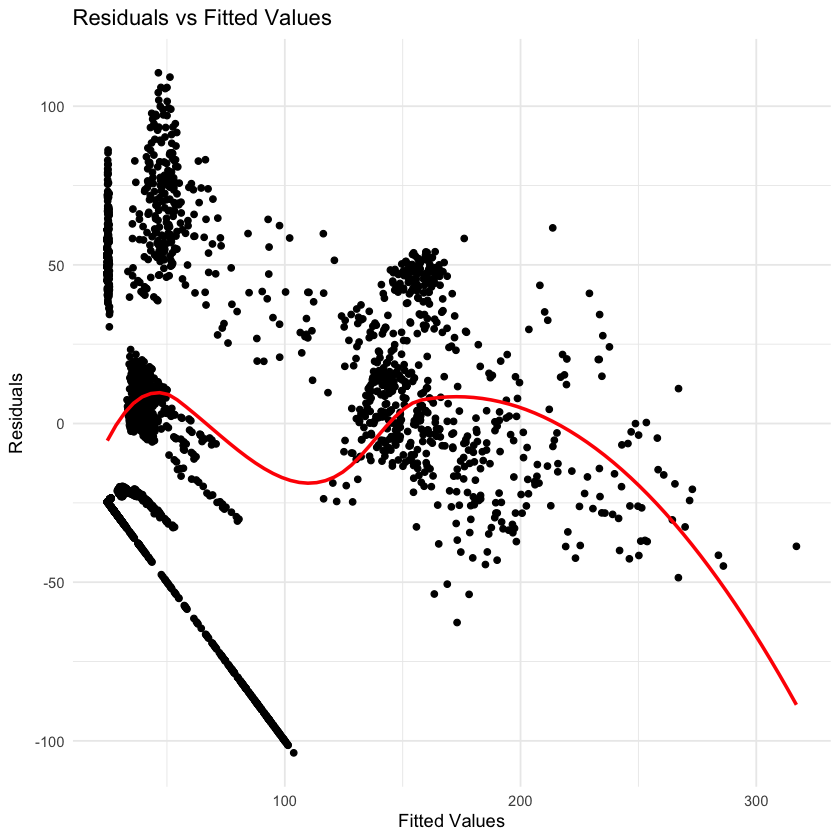

In [22]:
# Residuals vs. Fitted plot for Interaction Model
ggplot(data.frame(Fitted = fitted(interaction_model), Residuals = residuals(interaction_model)), aes(x = Fitted, y = Residuals)) + 
  geom_point() + 
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

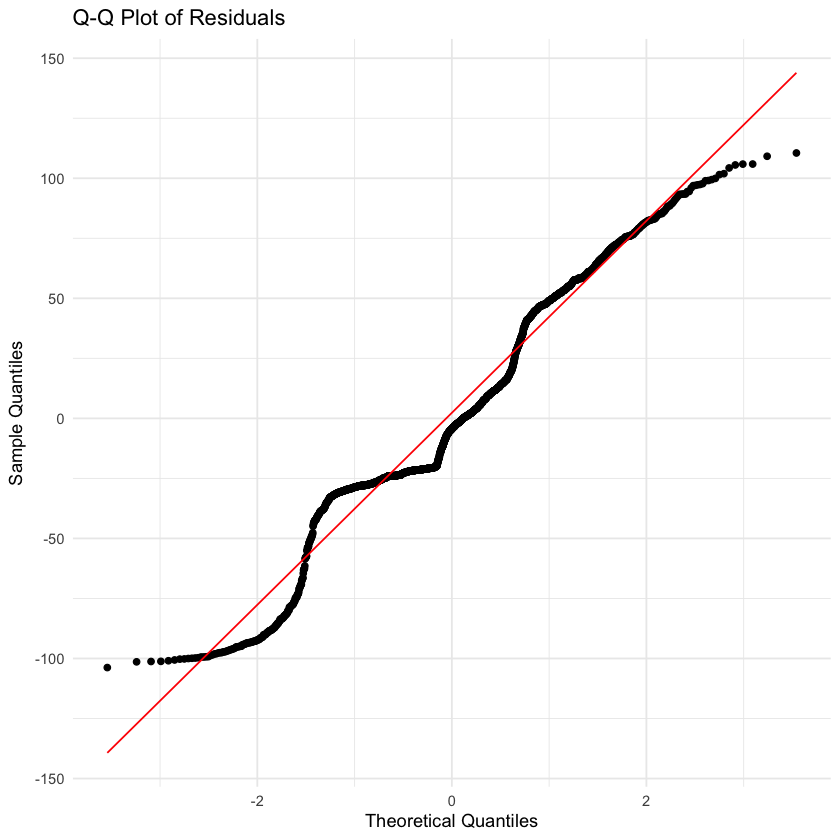

In [23]:
# Q-Q Plot of Residuals for Interaction Model
ggplot(data.frame(Sample = residuals(interaction_model)), aes(sample = Sample)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(title = "Q-Q Plot of Residuals", x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal()

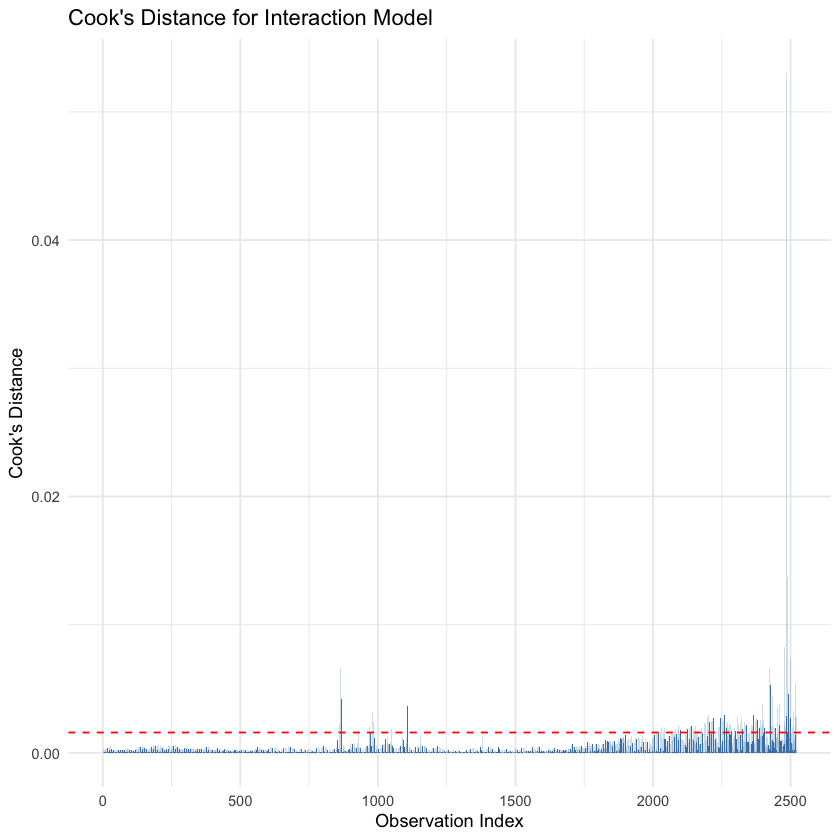

In [24]:
# Cook's Distance Plot for Interaction Model
cooks_distance <- cooks.distance(interaction_model)
cooks_data <- data.frame(Index = 1:length(cooks_distance), Cook = cooks_distance)

ggplot(cooks_data, aes(x = Index, y = Cook)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Cook's Distance for Interaction Model", x = "Observation Index", y = "Cook's Distance") +
  geom_hline(yintercept = 4 / length(cooks_distance), color = "red", linetype = "dashed") + 
  theme_minimal()

### Feature Selection Plan
1. Initial Significance: Based on the model summary and ANOVA output, all predictors and the interaction term Solar_Energy:Wind_Energy are significant. Each predictor (Solar Energy, Wind Energy, Biomass Energy, Hydroelectric Power) should be kept.
2. The Residuals vs. Fitted plot shows some patterns and deviations from homoscedasticity, so there might be non-constant variance across fitted values. A possible next step is to examine transformations or to fit a generalized linear model to better handle non-constant variance.
3. The Q-Q plot shows deviations from normality, especially in the tails. This could mean there are outliers or skewness in the data. Removing or transforming extreme outliers may help normalize residuals.
4. The Cook’s Distance reveals influential points. Inspecting these points and removing or adjusting them if they are determined to be genuine outliers will help model’s accuracy and stability.
5. Iiteratively testing predictor combinations, including cross-validation to confirm the model's generalizability and robustness, and balancing additional interactions will help refine my model.  
## Model Evaluation & Validation  
### Documentation of Model Adjustments

In [25]:
# Step 1: Check Rows for 0 or Non-Positive Values and Remove Them
problematic_rows <- filtered_data[filtered_data$Total_Renewable_Energy <= 0, ]
print(head(problematic_rows))

# Remove problematic rows
filtered_data <- filtered_data[filtered_data$Total_Renewable_Energy > 0, ]

   Year Month Total_Renewable_Energy Solar_Energy Wind_Energy Biomass_Energy
5  1980     1                      0            0           0              0
10 1980     2                      0            0           0              0
15 1980     3                      0            0           0              0
20 1980     4                      0            0           0              0
25 1980     5                      0            0           0              0
30 1980     6                      0            0           0              0
   Hydroelectric_Power
5                    0
10                   0
15                   0
20                   0
25                   0
30                   0


In [26]:
# Step 2: Log Transform the Response Variable to Address Variance 
filtered_data$log_Total_Renewable_Energy <- log(filtered_data$Total_Renewable_Energy + 1) # Adding a small constant to avoid -Inf
summary(filtered_data$log_Total_Renewable_Energy) # Verify transformation

# Refit the Model with Log-Transformed Response
log_model <- lm(log_Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + Biomass_Energy + Hydroelectric_Power, data = filtered_data)
summary(log_model) # Check model fit
bptest(log_model) # Check for heteroscedasticity

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9613  3.3977  4.3911  4.0414  5.0215  5.6324 


Call:
lm(formula = log_Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + 
    Biomass_Energy + Hydroelectric_Power, data = filtered_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27538 -0.62069  0.06262  0.50771  1.49606 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.2177190  0.0290923 110.604   <2e-16 ***
Solar_Energy              0.0763368  0.0071327  10.702   <2e-16 ***
Wind_Energy               0.0303832  0.0020068  15.140   <2e-16 ***
Biomass_Energy            0.0117162  0.0004564  25.672   <2e-16 ***
Hydroelectric_Power      -0.0401857  0.0754564  -0.533    0.594    
Solar_Energy:Wind_Energy -0.0012185  0.0001157 -10.535   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8541 on 2010 degrees of freedom
Multiple R-squared:  0.4921,	Adjusted R-squared:  0.4909 
F-statistic: 389.6 on 5 and 2010 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  log_model
BP = 778.73, df = 5, p-value < 2.2e-16


In [27]:
# Step 3: Remove Influential Points 
# Iterative removal of influential points and save cleaned data 
repeat {
    cooks_distances <- cooks.distance(lm(log_Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + Biomass_Energy + Hydroelectric_Power, 
                                                 data = filtered_data)) # Calculate Cook's Distances for the cleaned data
    influential_points <- which(cooks_distances > 4 / nrow(filtered_data)) # Identify influential points
    if (length(influential_points) == 0) break
    filtered_data <- filtered_data[-influential_points, ] # Remove influential points
}

In [28]:
# Step 4: Apply log transformations to predictors (adding a small constant to avoid log(0)) 
filtered_data$log_Solar_Energy <- log(filtered_data$Solar_Energy + 1)
filtered_data$log_Wind_Energy <- log(filtered_data$Wind_Energy + 1)
filtered_data$log_Biomass_Energy <- log(filtered_data$Biomass_Energy + 1)
filtered_data$log_Hydroelectric_Power <- log(filtered_data$Hydroelectric_Power + 1)

In [29]:
# Step 5: Bootstrapping Method to Analyze MLR
bootstrap_mlr <- function(data, formula, n_bootstrap = 1000) { # Define a function to bootstrap regression coefficients
  set.seed(123) # For reproducibility
  boot_results <- replicate(n_bootstrap, {
    # Resample data with replacement
    boot_sample <- data[sample(1:nrow(data), replace = TRUE), ]
    
    # Fit the linear model on the resampled data
    boot_model <- lm(formula, data = boot_sample)
    
    # Extract the coefficients
    coef(boot_model)
  })
  
  # Transpose the result for easier interpretation
  t(boot_results)
}

# Bootstrapping for log-transformed model
formula <- log_Total_Renewable_Energy ~ log_Solar_Energy + log_Wind_Energy + log_Biomass_Energy + log_Hydroelectric_Power
boot_results <- bootstrap_mlr(data = filtered_data, formula = formula, n_bootstrap = 1000)

# Calculate summary statistics for coefficients
boot_summary <- apply(boot_results, 2, function(x) {
  c(mean = mean(x), sd = sd(x), ci_lower = quantile(x, 0.025), ci_upper = quantile(x, 0.975))
})
boot_summary <- as.data.frame(t(boot_summary))

print(boot_summary)

                                mean         sd ci_lower.2.5% ci_upper.97.5%
(Intercept)              3.032026252 0.07702922    2.88736175     3.18247653
log_Solar_Energy         0.398907524 0.04029832    0.31640202     0.47934683
log_Wind_Energy          2.716043543 0.12833967    2.47302330     2.97281047
log_Biomass_Energy      -0.008108388 0.02689203   -0.05974304     0.04224791
log_Hydroelectric_Power  3.022691173 0.14202309    2.74323387     3.30668856


> **Note:** After further cleaning of the data (removing influential points and applying log transformations to the predictor and response variables), I am going to test different models and compare which is best for predictive accuracy and capturing complex relationships.

In [30]:
# Step 6: Test Different Models 
# Fit the Transformed Log Model 
log_model_transformed <- lm(log_Total_Renewable_Energy ~ log_Solar_Energy * log_Wind_Energy + 
                            log_Biomass_Energy + log_Hydroelectric_Power, 
                            data = filtered_data)
summary(log_model_transformed) # Check model fit
bptest(log_model_transformed) # Check for heteroscedasticity


Call:
lm(formula = log_Total_Renewable_Energy ~ log_Solar_Energy * 
    log_Wind_Energy + log_Biomass_Energy + log_Hydroelectric_Power, 
    data = filtered_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02538 -0.67763 -0.04533  0.53361  1.97897 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        2.94462    0.05009  58.784   <2e-16 ***
log_Solar_Energy                   0.48997    0.03481  14.074   <2e-16 ***
log_Wind_Energy                    4.57007    0.27921  16.368   <2e-16 ***
log_Biomass_Energy                 0.04372    0.02144   2.039   0.0416 *  
log_Hydroelectric_Power            2.77916    0.13714  20.265   <2e-16 ***
log_Solar_Energy:log_Wind_Energy -12.86038    1.50511  -8.544   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8885 on 1690 degrees of freedom
Multiple R-squared:  0.4705,	Adjusted R-squared:  0.4689 
F-stati


	studentized Breusch-Pagan test

data:  log_model_transformed
BP = 842.22, df = 5, p-value < 2.2e-16


> **Note:** This model's p-value for the Breusch-Pagan test still shows significant heteroscedasticity and a low R-squared.

In [31]:
# Step 7: Test Different Models 
# Fit the Weighted Least Squares (WLS) Model 
weights_transformed <- 1 / fitted(log_model_transformed)^2
wls_model_transformed <- lm(log_Total_Renewable_Energy ~ log_Solar_Energy * log_Wind_Energy + 
                             log_Biomass_Energy + log_Hydroelectric_Power, 
                             data = filtered_data, weights = weights_transformed)
summary(wls_model_transformed) # Check model fit 
bptest(wls_model_transformed) # Check for heteroscedasticity


Call:
lm(formula = log_Total_Renewable_Energy ~ log_Solar_Energy * 
    log_Wind_Energy + log_Biomass_Energy + log_Hydroelectric_Power, 
    data = filtered_data, weights = weights_transformed)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.69844 -0.14628 -0.03246  0.13925  0.71842 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.22584    0.04848  66.544  < 2e-16 ***
log_Solar_Energy                   0.36779    0.03739   9.837  < 2e-16 ***
log_Wind_Energy                    5.29114    0.36243  14.599  < 2e-16 ***
log_Biomass_Energy                -0.18578    0.02460  -7.552 6.97e-14 ***
log_Hydroelectric_Power            4.38309    0.18454  23.751  < 2e-16 ***
log_Solar_Energy:log_Wind_Energy -10.11980    1.75763  -5.758 1.01e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2701 on 1690 degrees of freedom
Multiple R-squared:  0.38


	studentized Breusch-Pagan test

data:  wls_model_transformed
BP = 72.701, df = 5, p-value = 2.806e-14


> **Note:** While the WLS model's p-value for the Breusch-Pagan test increased compared to the log model's p-value, there is still significant heteroscedasticity and a low R-squared.

In [32]:
# Step 8: Test Different Models 
# Fit the Generalized Additive (GAM) Model 
gam_model <- gam(log_Total_Renewable_Energy ~ 
                 s(log_Solar_Energy) + s(log_Wind_Energy) + 
                 s(log_Biomass_Energy) + s(log_Hydroelectric_Power), 
                 data = filtered_data)

# Extract residuals and fitted values 
gam_residuals <- residuals(gam_model, type = "pearson")
gam_fitted <- fitted(gam_model)

bp_test_gam <- bptest(gam_residuals ~ gam_fitted)
summary(gam_model) # Check model fit 
print(bp_test_gam) # Check for heteroscedasticity


Family: gaussian 
Link function: identity 

Formula:
log_Total_Renewable_Energy ~ s(log_Solar_Energy) + s(log_Wind_Energy) + 
    s(log_Biomass_Energy) + s(log_Hydroelectric_Power)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.87075    0.00701   552.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df       F p-value    
s(log_Solar_Energy)        3.198  4.022   41.33  <2e-16 ***
s(log_Wind_Energy)         7.883  8.655   11.12  <2e-16 ***
s(log_Biomass_Energy)      8.965  8.999 1581.77  <2e-16 ***
s(log_Hydroelectric_Power) 1.000  1.000    0.07   0.791    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.944   Deviance explained = 94.5%
GCV = 0.08445  Scale est. = 0.083352  n = 1696


	studentized Breusch-Pagan test

data:  gam_residuals ~ gam_fitted
BP = 124.88, df = 1, p-value < 2.2e-16



> **Note:** While the GAM model's p-value for the Breusch-Pagan test still shows significant heteroscedasticity, this model displays an excellent fit and predictive power with a 0.944 R-squared value.

In [33]:
# Step 9: Test Different Models 
# Fit the Generalized Linear (GLM) Model 
glm_model <- glm(log_Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + Biomass_Energy + Hydroelectric_Power, data = filtered_data, family = gaussian(link = "log"))
summary(glm_model)

# Calculates McFadden's R-squared
null_model <- glm(log_Total_Renewable_Energy ~ 1, data = filtered_data, family = gaussian(link = "log"))
log_lik_full <- logLik(glm_model)
log_lik_null <- logLik(null_model)
pseudo_r2 <- 1 - as.numeric(log_lik_full / log_lik_null)

cat("McFadden's R-squared:", pseudo_r2) # Check model fit 
bptest(glm_model) # Check for heteroscedasticity


Call:
glm(formula = log_Total_Renewable_Energy ~ Solar_Energy * Wind_Energy + 
    Biomass_Energy + Hydroelectric_Power, family = gaussian(link = "log"), 
    data = filtered_data)

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.095e+00  9.722e-03 112.682  < 2e-16 ***
Solar_Energy              3.921e-02  2.266e-03  17.306  < 2e-16 ***
Wind_Energy               6.237e-01  3.654e-02  17.070  < 2e-16 ***
Biomass_Energy            2.731e-03  9.005e-05  30.326  < 2e-16 ***
Hydroelectric_Power       8.079e-02  1.432e-02   5.641 1.98e-08 ***
Solar_Energy:Wind_Energy -1.455e+00  1.685e-01  -8.633  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.645369)

    Null deviance: 2519.6  on 1695  degrees of freedom
Residual deviance: 1090.7  on 1690  degrees of freedom
AIC: 4078.3

Number of Fisher Scoring iterations: 5


McFadden's R-squared: 0.2589316


	studentized Breusch-Pagan test

data:  glm_model
BP = 733.95, df = 5, p-value < 2.2e-16


> **Note:** GLS model shows significant heteroscedasticity and has a very low R-squared value.

Summary of iterative process:
1. First, I checked for rows with 0 or non-positive values in the response variable and removed them.
2. I applied a log transformation to the response variable to address variance issues.
3. Then, I removed influential points iteratively using Cook's Distance to improve model stability.
4. Next, I applied log transformations to predictors to handle skewness.
5. I applied the Bootstrapping function to the log transformed variables.
6. I fitted a log-linear model while checking for heteroscedasticity.
7. Then, I tested a Weighted Least Squares (WLS) model to account for non-constant variance across fitted values.
8. I also tested a Generalized Additive Model (GAM) to incorporate non-linear relationships between predictors and the response variable.
9. Finally, I fit a Generalized Linear Model (GLM) with a log link and calculated McFadden's R² to evaluate model performance.

Final Model Equation: $Y$ = $\beta_0$ + s(log($X_1$)) + s(log($X_2$)) + s(log($X_3$)) + s(log($X_4$)) + $\epsilon$  
Where $Y$: Total Renewable Energy (in log-transformed scale)  
$X_1$: Solar Energy (log-transformed predictor)  
$X_2$: Wind Energy (log-transformed predictor)  
$X_3$: Biomass Energy (log-transformed predictor)  
$X_4$: Hydroelectric Power (log-transformed predictor)  
s(⋅): Smoothing function applied to each log-transformed predictor

## Model Evaluation  
**Evaluations:**
1. Significance Test
2. ANOVA 
3. Model Performance Metrics
4. Train-test Split
5. K-fold Cross-Validation
### Significance Tests
**Null Hypothesis ($H_0$):**  
Solar, wind, biomass, and hydroelectric energy do not have a significant impact on total renewable energy consumption.  
$H_0$: $\beta_1X_1$ = $\beta_2X_2$ = $\beta_3X_3$ = $\beta_4X_4$ = 0  
  
**Alternative Hypothesis ($H_1$):**  
At least one of the predictors has a significant impact on total renewable energy consumption.  
$H_1$: At least one $\beta_j$ &#8800; 0 for j = {1, 2, 3, 4}

In [34]:
# Model summary
gam_summary <- summary(gam_model)
gam_summary

# Access smooth term p-values
p_values <- gam_summary$s.table[, 4] # Extract p-values for smooth terms
print(p_values)


Family: gaussian 
Link function: identity 

Formula:
log_Total_Renewable_Energy ~ s(log_Solar_Energy) + s(log_Wind_Energy) + 
    s(log_Biomass_Energy) + s(log_Hydroelectric_Power)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.87075    0.00701   552.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df       F p-value    
s(log_Solar_Energy)        3.198  4.022   41.33  <2e-16 ***
s(log_Wind_Energy)         7.883  8.655   11.12  <2e-16 ***
s(log_Biomass_Energy)      8.965  8.999 1581.77  <2e-16 ***
s(log_Hydroelectric_Power) 1.000  1.000    0.07   0.791    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.944   Deviance explained = 94.5%
GCV = 0.08445  Scale est. = 0.083352  n = 1696

       s(log_Solar_Energy)         s(log_Wind_Energy) 
                 0.0000000                  0.0000000 
     s(log_Biomass_Energy) s(log_Hydroelectric_Power) 
                 0.0000000                  0.7911974 


In [35]:
# Fit a linear model as a baseline
linear_model <- lm(log_Total_Renewable_Energy ~ log_Solar_Energy + log_Wind_Energy + log_Biomass_Energy + log_Hydroelectric_Power, 
                   data = filtered_data)

# Fit the GAM model
gam_model <- gam(log_Total_Renewable_Energy ~ 
                   s(log_Solar_Energy) + s(log_Wind_Energy) + 
                   s(log_Biomass_Energy) + s(log_Hydroelectric_Power),
                 data = filtered_data)
                 
# Perform ANOVA comparison
anova_gam <- anova(linear_model, gam_model, test = "F")
print(anova_gam)

Analysis of Variance Table

Model 1: log_Total_Renewable_Energy ~ log_Solar_Energy + log_Wind_Energy + 
    log_Biomass_Energy + log_Hydroelectric_Power
Model 2: log_Total_Renewable_Energy ~ s(log_Solar_Energy) + s(log_Wind_Energy) + 
    s(log_Biomass_Energy) + s(log_Hydroelectric_Power)
  Res.Df     RSS     Df Sum of Sq     F    Pr(>F)    
1   1691 1391.80                                     
2   1674  139.53 17.046    1252.3 881.4 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Model Performance Metrics

In [41]:
# Extract predictions and actual values
gam_predictions <- predict(gam_model, newdata = filtered_data)
actual_values <- filtered_data$log_Total_Renewable_Energy

# Step 2: Compute performance metrics
mse <- mse(actual_values, gam_predictions) # Mean Squared Error (MSE)
rmse <- rmse(actual_values, gam_predictions) # Root Mean Squared Error (RMSE)
mae <- mae(actual_values, gam_predictions) # Mean Absolute Error (MAE)

# R-squared (explained variance)
sst <- sum((actual_values - mean(actual_values))^2) # Total sum of squares
sse <- sum((actual_values - gam_predictions)^2) # Residual sum of squares
r_squared <- 1 - (sse / sst)

cat("Model Performance Metrics for GAM:\n")
cat("MSE:", mse, "\n")
cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")
cat("R-squared:", r_squared, "\n")

Model Performance Metrics for GAM:
MSE: 0.08226861 
RMSE: 0.2868251 
MAE: 0.1535805 
R-squared: 0.9446228 


### Validation Findings

In [40]:
# Split the data into training (80%) and testing (20%) sets
set.seed(123)  # For reproducibility
train_index <- createDataPartition(filtered_data$log_Total_Renewable_Energy, p = 0.8, list = FALSE)
train_data <- filtered_data[train_index, ]
test_data <- filtered_data[-train_index, ]

# Fit the GAM model on the training data
gam_model_train <- gam(log_Total_Renewable_Energy ~ 
                       s(log_Solar_Energy) + s(log_Wind_Energy) + 
                       s(log_Biomass_Energy) + s(log_Hydroelectric_Power), 
                       data = train_data)

# Make predictions on the testing data
gam_predictions_test <- predict(gam_model_train, newdata = test_data)

# Compute validation metrics
actual_values_test <- test_data$log_Total_Renewable_Energy # Actual values

# Calculate performance metrics
mse_test <- mse(actual_values_test, gam_predictions_test)
rmse_test <- rmse(actual_values_test, gam_predictions_test)
mae_test <- mae(actual_values_test, gam_predictions_test)

# Compute R-squared for the test set
sst_test <- sum((actual_values_test - mean(actual_values_test))^2) # Total sum of squares
sse_test <- sum((actual_values_test - gam_predictions_test)^2) # Residual sum of squares
r_squared_test <- 1 - (sse_test / sst_test)

cat("Validation Metrics for GAM Model (on Test Data):\n")
cat("MSE:", mse_test, "\n")
cat("RMSE:", rmse_test, "\n")
cat("MAE:", mae_test, "\n")
cat("R-squared:", r_squared_test, "\n")

Validation Metrics for GAM Model (on Test Data):
MSE: 0.1130188 
RMSE: 0.3361827 
MAE: 0.1781397 
R-squared: 0.9283378 


In [43]:
# Model Validation With k-fold Cross Validation
# Initialize vectors to store performance metrics
k <- 10
mse_list <- numeric(k)
rmse_list <- numeric(k)
mae_list <- numeric(k)  
r_squared_list <- numeric(k)

set.seed(123)
folds <- createFolds(filtered_data$log_Total_Renewable_Energy, k = k)
# Perform k-fold cross-validation
for (i in 1:k) {
  # Split into training and testing sets
  train_indices <- unlist(folds[-i])
  test_indices <- unlist(folds[i])
  
  train_data <- filtered_data[train_indices, ]
  test_data <- filtered_data[test_indices, ]
  
  # Fit the GAM model on training data
  gam_model <- gam(log_Total_Renewable_Energy ~ 
                     s(log_Solar_Energy) + s(log_Wind_Energy) + 
                     s(log_Biomass_Energy) + s(log_Hydroelectric_Power),
                   data = train_data)
  
  # Make predictions on test data
  predictions <- predict(gam_model, newdata = test_data)
  
  # Calculate actual values
  actual_values <- test_data$log_Total_Renewable_Energy
  
  # Compute performance metrics
  mse <- mean((actual_values - predictions)^2)
  rmse <- sqrt(mse)
  mae <- mean(abs(actual_values - predictions)) 
  r_squared <- 1 - (sum((actual_values - predictions)^2) / sum((actual_values - mean(actual_values))^2))
  
  # Store metrics for this fold
  mse_list[i] <- mse
  rmse_list[i] <- rmse
  mae_list[i] <- mae  
  r_squared_list[i] <- r_squared
}

# Compute average performance metrics across all folds
mean_mse <- mean(mse_list)
mean_rmse <- mean(rmse_list)
mean_mae <- mean(mae_list)  
mean_r_squared <- mean(r_squared_list)

cat("Cross-Validation Results for GAM Model:\n")
cat("Average MSE:", mean_mse, "\n")
cat("Average RMSE:", mean_rmse, "\n")
cat("Average MAE:", mean_mae, "\n")  
cat("Average R-squared:", mean_r_squared, "\n")

Cross-Validation Results for GAM Model:
Average MSE: 0.08383885 
Average RMSE: 0.2868604 
Average MAE: 0.1551613 
Average R-squared: 0.9434694 


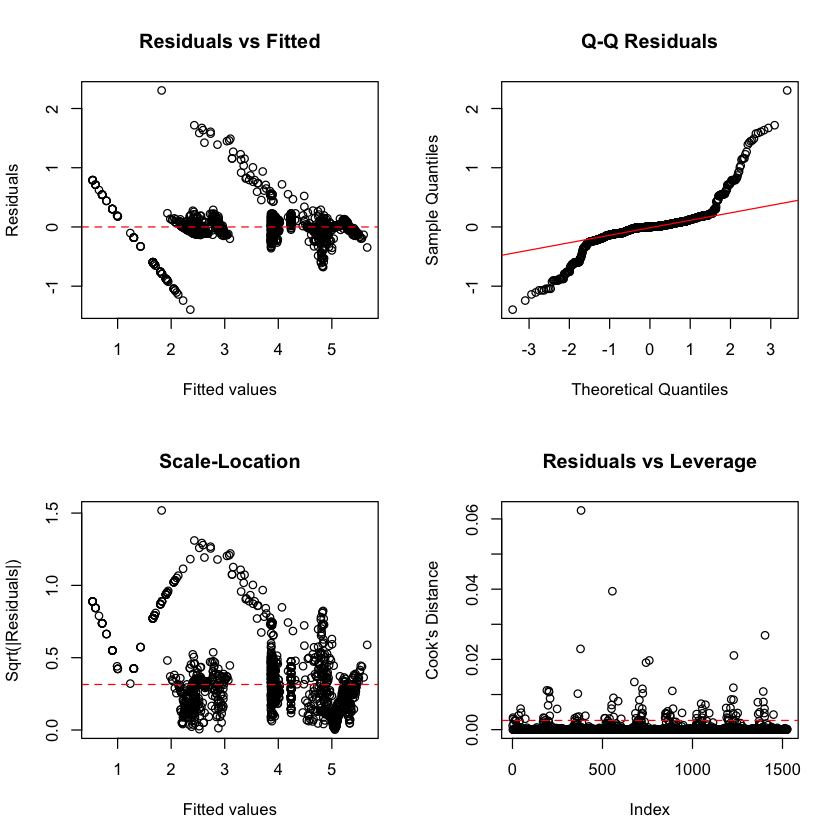

In [49]:
par(mfrow = c(2, 2), bg = "white") 

# Residuals vs Fitted Plot
plot(gam_model$fitted.values, residuals(gam_model), 
     xlab = "Fitted values", ylab = "Residuals", 
     main = "Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2) 

# Q-Q Plot
qqnorm(residuals(gam_model), main = "Q-Q Residuals")
qqline(residuals(gam_model), col = "red") 

# Scale-Location Plot
sqrt_abs_residuals <- sqrt(abs(residuals(gam_model)))
plot(gam_model$fitted.values, sqrt_abs_residuals,
     xlab = "Fitted values", ylab = "Sqrt(|Residuals|)", 
     main = "Scale-Location")
abline(h = mean(sqrt_abs_residuals, na.rm = TRUE), col = "red", lty = 2)

# Residuals vs Leverage Plot
influence <- cooks.distance(gam_model)
plot(influence, xlab = "Index", ylab = "Cook's Distance", 
     main = "Residuals vs Leverage")
abline(h = 4 / length(gam_model$fitted.values), col = "red", lty = 2)

## Summary of Findings
The Generalized Additive Model (GAM) was selected as my final model for analyzing the impact of renewable energy sources (solar, wind, biomass, and hydroelectric power) on total renewable energy consumption in the U.S. The significance tests revealed that the smooth terms for solar, wind, and biomass energy were highly significant (p < 0.05), indicating their strong contributions to explaining the variability in total renewable energy consumption. The model performance metrics demonstrated an excellent fit and predictive power, with an R-squared (adj.) of 0.945, explaining 94.5% of the variance in the data, and low error values (MSE = 0.082, RMSE = 0.287). Validation through 10-fold-cross-validation showed consistent results across folds, with an average R-squared of 0.943 and similarly low error values, confirming the model's robustness. Additionally, bootstrapping revealed stable coefficicent estimates with narrow confidence intervals showing that the predictors are reliable. Validation on the test data showed strong predictive ability, with an R-squared of 0.928 supporting the hypothesis that the combined influence of solar, wind, biomass, and hydroelectric energy significantly explains the growth in total renewable energy consumption. The final model equation uses smooth terms to capture non-linear relationships, confirming the GAM's suitability for this analysis.